### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np

### Importing Data

In [2]:
# Importing the Data
life = pd.read_csv('Life Expectancy Data.csv')

# Selecting columns that will be used for the analysis
cols = ['Country', 'Year', 'Status', 'Life expectancy ', 'Alcohol', 'percentage expenditure', ' BMI ', ' HIV/AIDS', 
        'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
life = life.loc[:,cols]
life

,Country,Year,Status,Life expectancy,Alcohol,percentage expenditure,BMI,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,0.01,71.279624,19.1,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,0.01,73.523582,18.6,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,0.01,73.219243,18.1,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,0.01,78.184215,17.6,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,0.01,7.097109,17.2,0.1,63.537231,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,4.36,0.000000,27.1,33.6,454.366654,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,4.06,0.000000,26.7,36.7,453.351155,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,4.43,0.000000,26.3,39.8,57.348340,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,1.72,0.000000,25.9,42.1,548.587312,1.6,1.7,0.427,9.8


In [3]:
# Before Imputation:
print(life.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Alcohol                            194
percentage expenditure               0
 BMI                                34
 HIV/AIDS                            0
GDP                                448
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


### Preprocessing

In [4]:
# Creating a loop where it calculates the mean of every column for every country
# Which then creates a dataframe(s) appending it to the empty list which is essentially 
# is a look-up table (Used as a sanity check)
mean_df_list = []

for col in life.columns[3:12]:
    mean_col = life.groupby(by = ['Country'], as_index = False)[col].mean()
    mean_df_list.append(mean_col)

In [5]:
# Calculates the mean of every column for every country and filling those missing values
# with those results
for country in list(life['Country'].unique()):
    for col in list(life.columns)[3:13]:
        life[col].loc[(life['Country'] == country)] = life[col].fillna(value = life.loc[life['Country'] == country, col].mean())

/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
# Sanity Check!
# As we can compare from the results made from the previous code chuck it
# Let's compare Yemen for Alcohol! And we can see it has the mean value just like in the sanity check!
# (Try Zimbabwe if you would like)
print(mean_df_list[1])
print('\n')
print(life.loc[life['Country'] == 'Yemen', 'Alcohol'])

                                Country   Alcohol
0                           Afghanistan  0.014375
1                               Albania  4.848750
2                               Algeria  0.406667
3                                Angola  5.740667
4                   Antigua and Barbuda  7.949333
..                                  ...       ...
188  Venezuela (Bolivarian Republic of)  7.420000
189                            Viet Nam  3.087333
190                               Yemen  0.047333
191                              Zambia  2.239333
192                            Zimbabwe  4.482000

[193 rows x 2 columns]


2890    0.047333
2891    0.010000
2892    0.040000
2893    0.040000
2894    0.040000
2895    0.060000
2896    0.030000
2897    0.040000
2898    0.050000
2899    0.040000
2900    0.040000
2901    0.060000
2902    0.040000
2903    0.070000
2904    0.080000
2905    0.070000
Name: Alcohol, dtype: float64


In [7]:
# After Imputation:
# We can see it fill in the values for a couple of the columns but not all unfortunately.
# The next option, is to go with the imputated version and drop 458 observations
# within our dataset which will leave us about ~2470 observations.
print(life.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Alcohol                             17
percentage expenditure               0
 BMI                                34
 HIV/AIDS                            0
GDP                                405
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


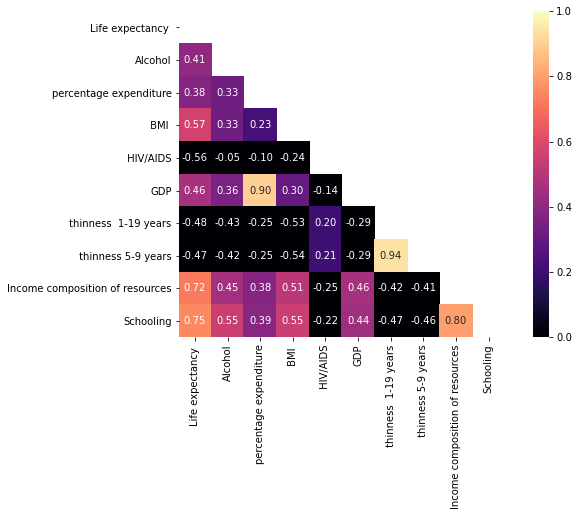

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
mask_ut = np.triu(np.ones(life.drop(['Year'], axis = 1).corr().shape)).astype(np.bool)
sns.heatmap(life.drop(['Year'], axis = 1).corr(),
            mask = mask_ut,
            annot = True,
            cmap = 'magma', 
            fmt= '.2f', 
            square=True, 
            vmin=0.0, 
            vmax=1.0, 
            annot_kws={'size': 10})
plt.show()

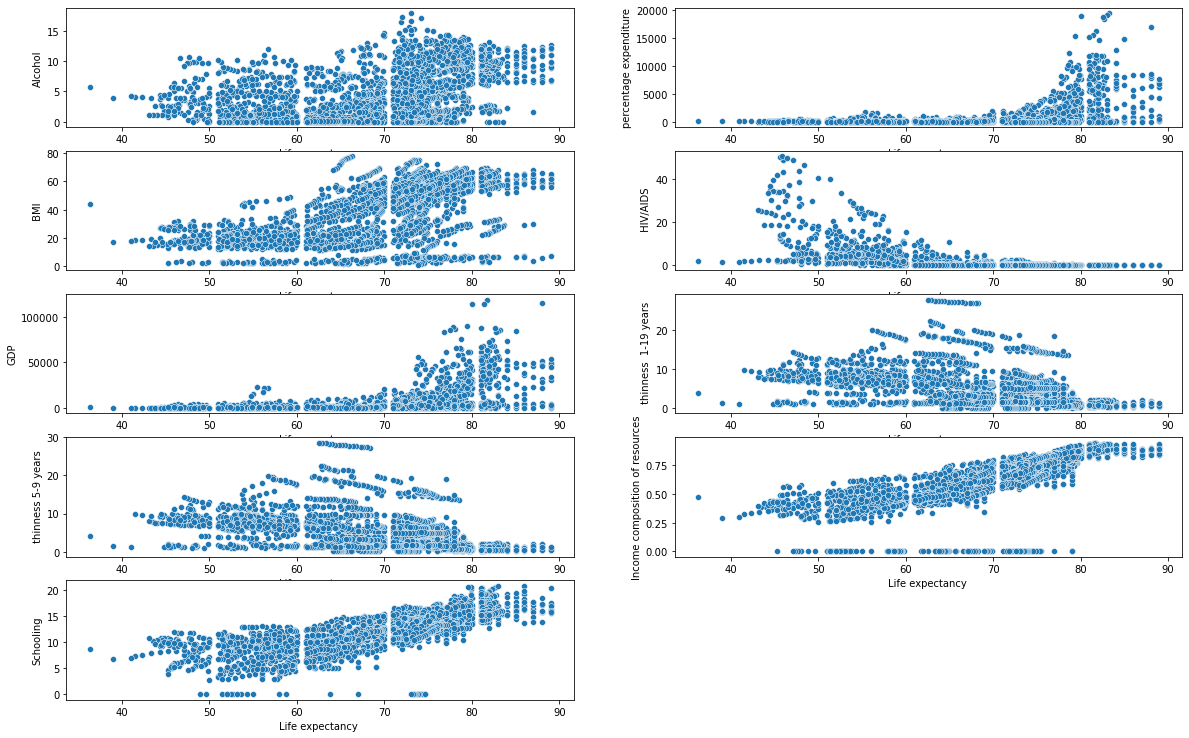

In [9]:
count=1
plt.figure(figsize = (20, 18))
for i in life.columns[4:14]:
    plt.subplot(7, 2, count)
    sns.scatterplot(x = "Life expectancy ", y = i, data = life)
    count+=1
plt.show()